# **Contours**
    
1. Using findContours
2. Drawing Contours
3. Hierachy of Contours
4. Contouring Modes (Simple vs Approx) 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [42]:
def cv_imshow(title="Image", image = None, size=20):
    w, h = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **What are Contours?**
Contours are continous lines or curves that bound or cover the full boundary of an object.

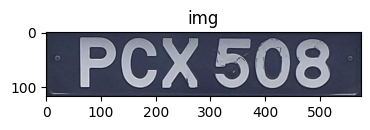

In [43]:
img = cv2.imread("../data/images/LP.jpg")
cv_imshow("img", img)

#### **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - returns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list. 

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line


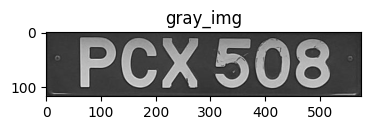

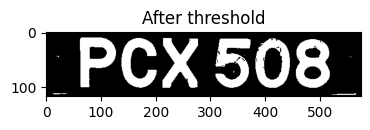

(117.0, None)

In [44]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv_imshow("gray_img", gray_img)

_, th2 = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, cv_imshow("After threshold",th2)

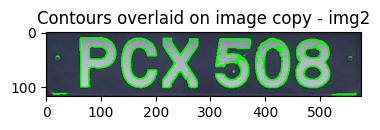

Number of Contours found = 38


In [45]:
# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hirarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# contours, hirarchy = cv2.findContours(gray_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

img2 = img.copy()
# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(img2,contours, -1, (0, 255, 0), thickness = 2)
cv_imshow("Contours overlaid on image copy - img2", img2)

print("Number of Contours found = " + str(len(contours)))

#### **What happens if we don't threshold? Bad things..**

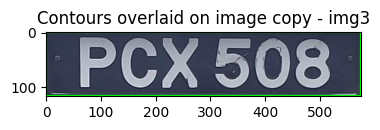

Number of Contours found = 1


In [49]:
# Finding Contours

contours, hirarchy = cv2.findContours(gray_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

img3 = img.copy()
# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(img3, contours, -1, (0, 255, 0), thickness = 2)
cv_imshow("Contours overlaid on image copy - img3", img3)

print("Number of Contours found = " + str(len(contours)))

#### **NOTE: For findContours to work, the background has to be black and foreground (i.e. the text or objects)** 

#### Otherwise you'll need to invert the image by using **cv2..bitwise_not(input_image)**

----
# **We can use Canny Edges instead of Thresholding**


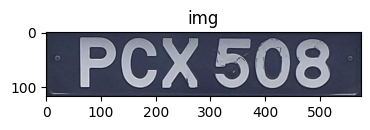

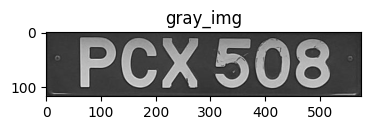

In [47]:
img = cv2.imread("../data/images/LP.jpg")
cv_imshow("img", img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv_imshow("gray_img", gray_img)

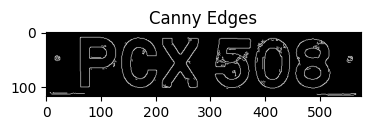

In [48]:
# Canny Edges
edge_img = cv2.Canny(gray_img, 30, 200)
cv_imshow("Canny Edges", edge_img)

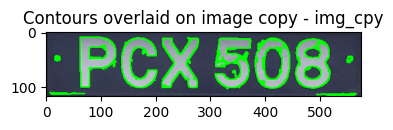

Number of Contours found = 77


In [51]:
# Finding Contours
contours, hierarchy = cv2.findContours(edge_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

img_cpy = img.copy()

cv2.drawContours(img_cpy, contours, -1, (0, 255, 0), thickness = 2)
cv_imshow("Contours overlaid on image copy - img_cpy", img_cpy)

print("Number of Contours found = " + str(len(contours)))

## **Remember these Countouring Steps**

1. Grayscale
2. Threshold or Canny Edge Detection to Binarize image

**Note:** Blurring before Step 2 is recommended to remove noisy contours

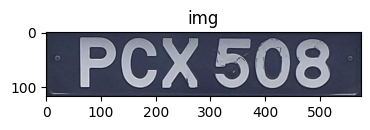

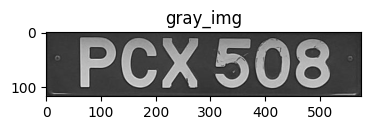

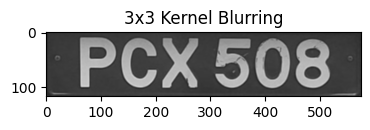

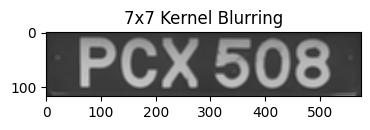

In [56]:
img = cv2.imread("../data/images/LP.jpg")
cv_imshow("img", img)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv_imshow("gray_img", gray_img)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blur3_img = cv2.filter2D(gray_img, -1, kernel_3x3)
cv_imshow("3x3 Kernel Blurring", blur3_img)


# Creating our 20 x 20 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blur7_img = cv2.filter2D(gray_img, -1, kernel_7x7)
cv_imshow("7x7 Kernel Blurring", blur7_img)

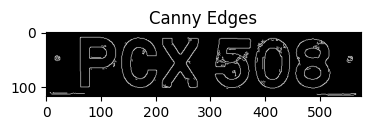

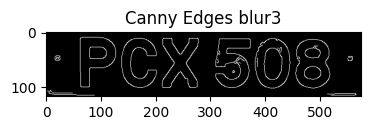

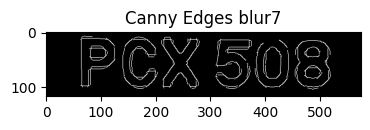

In [59]:
# Canny Edges
edge_img = cv2.Canny(gray_img, 30, 200)
cv_imshow("Canny Edges", edge_img)

edge3_img = cv2.Canny(blur3_img, 30, 200)
cv_imshow("Canny Edges blur3", edge3_img)

edge7_img = cv2.Canny(blur7_img, 30, 200)
cv_imshow("Canny Edges blur7", edge7_img)

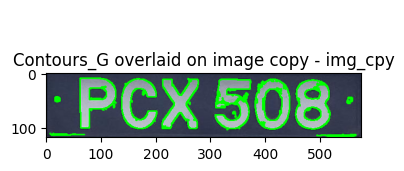

Number of Contours found = 77


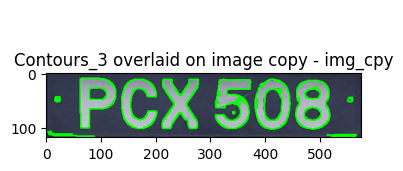

Number of Contours found = 37


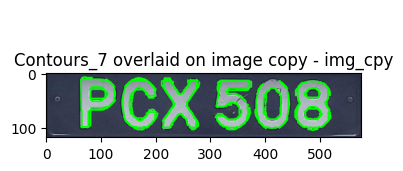

Number of Contours found = 46


In [64]:
# Finding Contours
contours_g, hierarchy_g = cv2.findContours(edge_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours_3, hierarchy_3 = cv2.findContours(edge3_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours_7, hierarchy_7 = cv2.findContours(edge7_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

img_cpy = img.copy()
img3_cpy = img.copy()
img7_cpy = img.copy()

cv2.drawContours(img_cpy, contours_g, -1, (0, 255, 0), thickness = 2)
cv_imshow("\n\nContours_G overlaid on image copy - img_cpy", img_cpy)
print("Number of Contours found = " + str(len(contours_g)))

cv2.drawContours(img3_cpy, contours_3, -1, (0, 255, 0), thickness = 2)
cv_imshow("\n\nContours_3 overlaid on image copy - img_cpy", img3_cpy)
print("Number of Contours found = " + str(len(contours_3)))

cv2.drawContours(img7_cpy, contours_7, -1, (0, 255, 0), thickness = 2)
cv_imshow("\n\nContours_7 overlaid on image copy - img_cpy", img7_cpy)
print("Number of Contours found = " + str(len(contours_7)))

# **Retreival Modes** 

Official Doc - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

**Hierachry**

This array stores 4 values for each contour:
- First term is the index of the Next contour
- Second term is the index of the Previous contour
- Third term is the index of the parent contour
- Forth term is the index of the child contour

### **RETR_LIST**
Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

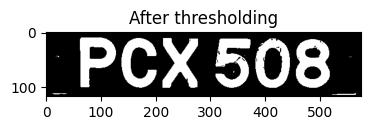

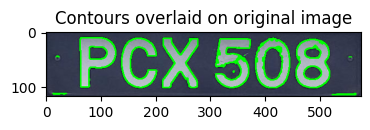

Number of Contours found = 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [-1 36 -1 -1]]]


In [68]:
img = cv2.imread("../data/images/LP.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv_imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


cv2.drawContours(img, contours, -1, (0,255,0), thickness = 2)
cv_imshow('Contours overlaid on original image', img)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_EXTERNAL**

Returns only extreme outer flags. All child contours are left behind.

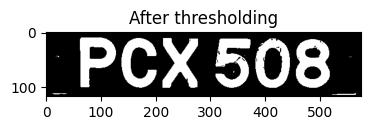

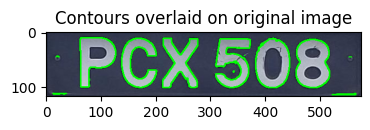

Number of Contours found = 16
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [-1 14 -1 -1]]]


In [69]:
img = cv2.imread("../data/images/LP.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv_imshow('After thresholding', th2)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


cv2.drawContours(img, contours, -1, (0,255,0), thickness = 2)
cv_imshow('Contours overlaid on original image', img)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)